# H.04 | Clustering and Time Series
**Due Date: 05.21.2024**

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets as sklearn_datasets
from statsmodels import datasets as statsmodels_datasets

-----------------------
# Clustering ([L.11](https://drc-cs.github.io/cs326/lectures/L11_unsupervised_machine_learning/#/))

In this section, you will be asked to implement the following functions in `clustering_and_time_series.py`:

1. **k_means**: Implement the K-means algorithm. The function takes the data points and the number of clusters K as input and returns the centroids of the K clusters. The algorithm should stop when the centroids do not change anymore.
2. **pairwise_manhattan_distance**: Implement a pairwise Manhattan distance function. The function takes two sets of data points as input and returns the pairwise Manhattan distance between the two sets of data points.
2. **local_silhouette_score**: Implement the silhouette score. The function takes the data points, the cluster labels, and the distance metric as input and returns the silhouette score of the clustering.
3. **dbscan**: Use the DBSCAN algorithm from sklearn. The function takes the data points, the epsilon value, and the minimum number of points as input and returns the cluster labels.

In [12]:
from clustering_and_time_series import k_means, local_silhouette_score

# Make blobs for KMeans.
X, y = sklearn_datasets.make_blobs(n_samples=500, centers=3, random_state=111)

# Grab three (k = 3) starting points.
start_points = X[[1, 2, 3], :]

# Run KMeans.
centers, labels = k_means(X, 3, start_points.copy(), max_iter = 5)
score = local_silhouette_score(X, labels, metric = "euclidean")

# Plot KMeans Results
fig = make_subplots(rows=1, cols=2, subplot_titles=("Original Data", f"K Means Clustering | Score {score:.2f}"))
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', name = "Data"), row=1, col=1)
fig.add_trace(go.Scatter(x=start_points[:, 0], y=start_points[:, 1], mode='markers', marker=dict(size=10, color='hotpink', line=dict(width=2, color='DarkSlateGrey')), name = "Start Points"), row=1, col=1)
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', name = "Data", marker=dict(color=labels)), row=1, col=2)
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', marker=dict(size=10, color='hotpink', line=dict(width=2, color='DarkSlateGrey')), name = "KMeans Centers"), row=1, col=2)
fig.update_layout(title='K Means Clustering', height=600, width=1200, template='plotly_white', showlegend=True)
fig.show()

In [13]:
from clustering_and_time_series import dbscan

X, y = sklearn_datasets.make_circles(n_samples=500, noise=0.02, factor=0.5, random_state=111)

# KMeans for comparison.
start_points = X[[1, 2], :]
centers, kmeans_labels = k_means(X, 2, start_points.copy())

# DBSCAN
dbscan_labels = dbscan(X, eps=0.1, min_samples=5)

# Plot KMeans and DBSCAN Results.
fig = make_subplots(rows=1, cols=3, subplot_titles=("Original Data", "K-Means Clustering", "DBSCAN Clustering"))
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', name = "Data"), row=1, col=1)
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', text = labels, name = "K-Means", marker=dict(color=kmeans_labels)), row=1, col=2)
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', marker=dict(size=10, color='blue', line=dict(width=2, color='DarkSlateGrey')), name = "KMeans Centers"), row=1, col=2)
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', name = "DBSCAN", marker=dict(color=dbscan_labels)), row=1, col=3)
fig.update_layout(title='K-Means vs DBScan Clustering', height=600, width=1200, template='plotly_white', showlegend=True)
fig.show()


-------------------
-------------------

----------
# Time Series Modeling ([L.13](https://drc-cs.github.io/cs326/lectures/L13_time_series/#/))

In this section, you will be asked to implement the following functions in `clustering_and_time_series.py`: 

1. **local_seasonal_decomposition**: Implement the seasonal decomposition of time series. The function takes the time series data and the period as input and returns the trend, seasonal, and residual components.
2. **difference**: Implement the differencing method to remove the trend from the time series data.
3. **is_stationary**: Implement the Augmented Dickey-Fuller test to check if the time series data is stationary.
4. **walk_forward_validation_arima**: Implement the walk-forward validation method for the ARIMA model. The function takes the time series data & the order of the ARIMA model, and returns the forecast.


*Note: Our dataset is collected from "Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A." from Keeling et al (2004).*

In [15]:
data = statsmodels_datasets.co2.load_pandas().data
data = data.iloc[-500:]
data.interpolate(inplace=True)

train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['co2'], mode='lines', name='Train & Validation Period'))
fig.add_trace(go.Scatter(x=test.index, y=test['co2'], mode='lines', name='Test Period'))
fig.update_layout(title='CO2 Dataset', height=600, width=1200, template='plotly_white', showlegend=True)
fig.show()

/var/folders/2p/d_p_5j795d95qqlk4_d0fbn00000gn/T/ipykernel_2567/2801982852.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Seasonal Decomposition

Seasonal decomposition is a method to decompose a time series into its components: trend, seasonality, and residuals. The decomposition is additive if the components are added together, and multiplicative if they are multiplied. The decomposition is useful for understanding the underlying patterns in the time series data.

In [16]:
from clustering_and_time_series import local_seasonal_decompose

result = local_seasonal_decompose(data['co2'], model='additive')

fig = make_subplots(rows=2, cols=2, shared_xaxes=False, shared_yaxes=False, subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))
fig.add_trace(go.Scatter(x=result.observed.index, y=result.observed, mode='lines', marker=dict(color = "blue")), row=1, col=1)
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', marker=dict(color = "blue")), row=1, col=2)
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', marker=dict(color = "blue")), row=2, col=1)
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines', marker=dict(color = "blue")), row=2, col=2)
fig.update_layout(height=600, width=1200, title_text="Seasonal Decomposition", template='plotly_white', showlegend = False)
fig.show()

### Stationarity & Differencing

Stationarity is important for time series modeling because many time series models assume that the data is stationary. If the time series is not stationary, differencing can be used to remove trends and make the time series stationary.

In [17]:
from clustering_and_time_series import difference, is_stationary

fig = make_subplots(rows=2, cols=1, subplot_titles=("Original Data", "Differenced Data"), shared_xaxes=True)
fig.add_trace(go.Scatter(x=train.index, y=train['co2'], mode='lines', name=f'Original Data | Stationary = {is_stationary(train["co2"], 0.05)}'), row=1, col=1)
for i in range(1, 3):
    differenced = difference(train['co2'], i)
    fig.add_trace(go.Scatter(x=train.index[i:], y=differenced, mode='lines', name=f'Differenced (d={i}) | Stationary = {is_stationary(differenced, 0.05)}'), row=2, col=1)
fig.update_layout(title='CO2 Levels After Differencing', height=600, width=1200, template='plotly_white', showlegend=True)
fig.show()

### Autocorrelation and Partial Autocorrelation

Autocorrelation is the correlation of a time series with a lagged version of itself. Partial autocorrelation is the correlation between two variables after removing the effect of other variables. Both autocorrelation and partial autocorrelation are used to identify the order of the ARIMA model.

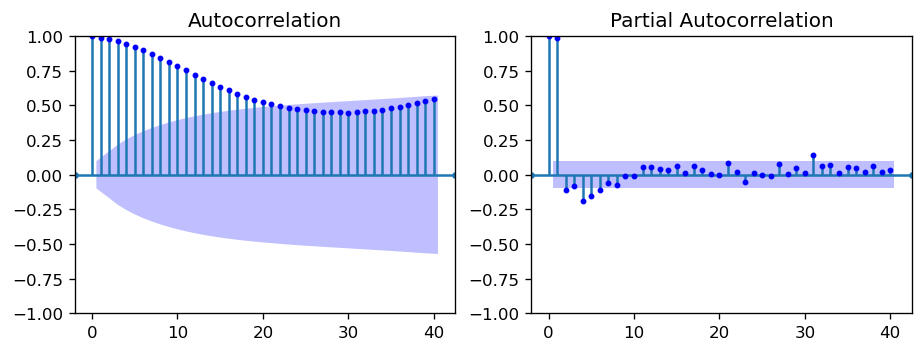

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(9, 3), dpi = 120)
ax[0].set_prop_cycle('color', 'blue')
ax[1].set_prop_cycle('color', 'blue')
plot_acf(train['co2'], lags=40, ax=ax[0], marker='.')
plot_pacf(train['co2'], lags=40, ax=ax[1], marker = '.')
fig = plt.gcf()
plt.show()

### ARIMA Modeling

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series model that combines autoregressive and moving average components. The ARIMA model is specified by three parameters: `p`, `d`, and `q`. The `p` parameter is the autoregressive order, the `d` parameter is the differencing order, and the `q` parameter is the moving average order.

In [20]:
from clustering_and_time_series import walk_forward_validation_arima, mse

arima_6_1_0_predictions = walk_forward_validation_arima(train['co2'], test['co2'], order = (6, 1, 0))
arima_1_1_0_predictions = walk_forward_validation_arima(train['co2'], test['co2'], order = (1, 1, 0))

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['co2'], mode='lines', name='Training / Validation Period'))
fig.add_trace(go.Scatter(x=test.index, y=test['co2'], mode='lines', name='Testing Period'))
fig.add_trace(go.Scatter(x=test.index, y=arima_1_1_0_predictions, mode='lines', name='ARIMA (1, 1, 0) | MSE = ' + str(round(mse(arima_1_1_0_predictions, test['co2']), 2))))
fig.add_trace(go.Scatter(x=test.index, y=arima_6_1_0_predictions, mode='lines', name='ARIMA (6, 1, 0) | MSE = ' + str(round(mse(arima_6_1_0_predictions, test['co2']), 2))))
fig.update_layout(height=600, width=1000, title_text="ARIMA Forecast", template='plotly_white')
fig.show()